Question 1

In [23]:
#part1
import numpy as np
import pandas as pd
machine=pd.read_csv('Machine.csv')
X=machine['Operating_hours']
y=machine['Output']
print('predictor variables ')
print(X)
print('output ')
print(y)

predictor variables 
0     3
1     5
2     9
3     7
4    11
5    15
6     4
7    18
Name: Operating_hours, dtype: int64
output 
0     5
1     8
2     8
3     7
4     9
5    12
6     6
7    22
Name: Output, dtype: int64


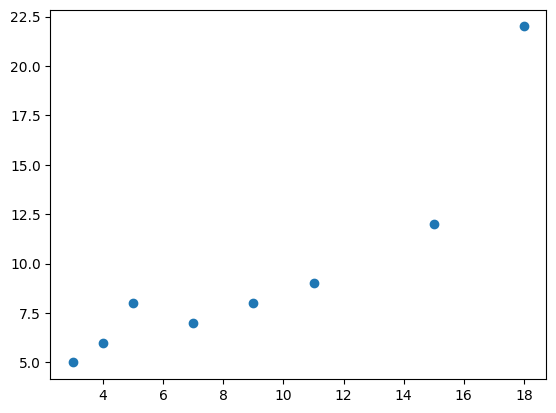

In [24]:
#part2
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [25]:
#part3
X_mean, X_std = X.mean(), X.std()
X_normalized = (X - X_mean) / X_std

X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

weights = np.zeros(X_normalized.shape[1])

learning_rate = 0.01
epochs = 2

for epoch in range(epochs):
    predictions = np.dot(X_normalized, weights)
    errors = predictions - y
    gradient = np.dot(X_normalized.T, errors) / len(y)
    weights -= learning_rate * gradient

print("Weights after 2 epochs:")
print(f"Intercept (bias): {weights[0]:.4f}")
print(f"Slope: {weights[1]:.4f}")

hours = 13
hours_normalized = (hours - X_mean) / X_std
input_vector = np.array([1, hours_normalized])
prediction = np.dot(input_vector, weights)
print(f"Predicted Output for 13 hours of operation: {prediction:.4f}")
mse = np.mean(errors**2)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Weights after 2 epochs:
Intercept (bias): 0.1915
Slope: 0.0843
Predicted Output for 13 hours of operation: 0.2543
Mean Squared Error (MSE): 116.1743


Question 2

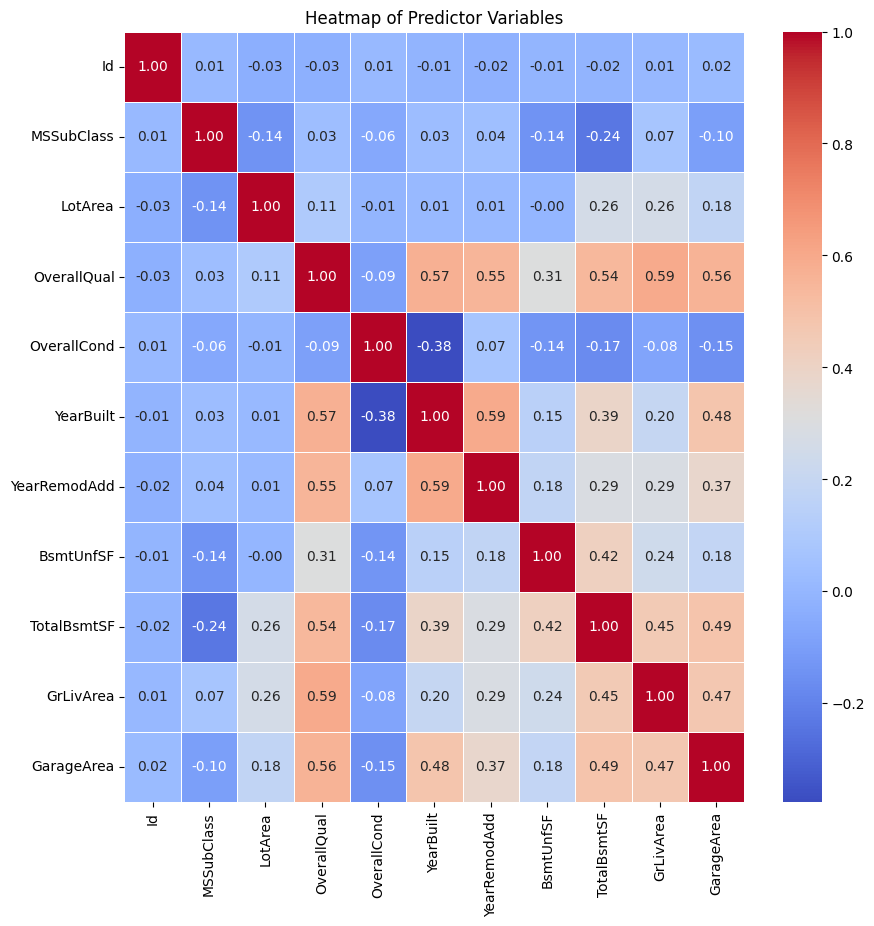

In [26]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
house = pd.read_csv('housePrice_small.csv')

predictors = house.drop(columns=['SalePrice']) 

encoder = LabelEncoder()
for column in predictors.columns:
    if predictors[column].dtype == 'object':  
        predictors[column] = encoder.fit_transform(predictors[column])

corrmat = predictors.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Predictor Variables')
plt.show()


Question 3

In [54]:
#part1
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
iris=load_iris() 

heart=pd.read_csv('heart.csv')

for i in heart.columns:
    if(heart[i].dtype=='object'):
        heart[i]=encoder.fit_transform(heart[i])

heartx=heart.drop(columns=['HeartDisease'])
hearty=heart['HeartDisease']
encoder=LabelEncoder()

irisdf=pd.DataFrame(iris.data,columns=iris.feature_names)
irisdf['species']=iris.target
irisdfx=irisdf.drop(columns=['species'])
irisdfy=irisdf['species']


model1=LogisticRegression(solver='lbfgs')
model2=LogisticRegression(solver='newton-cg')
model3=LogisticRegression(solver='liblinear')

model4=LogisticRegression(solver='lbfgs')
model5=LogisticRegression(solver='newton-cg')
model6=LogisticRegression(solver='liblinear')

model1.fit(heartx,hearty)
model2.fit(heartx,hearty)
model3.fit(heartx,hearty)

pred1=model1.predict(heartx)
pred2=model2.predict(heartx)
pred3=model3.predict(heartx)

model4.fit(irisdfx,irisdfy)
model5.fit(irisdfx,irisdfy)
model6.fit(irisdfx,irisdfy)

pred4=model4.predict(irisdfx)
pred5=model5.predict(irisdfx)
pred6=model6.predict(irisdfx)

acc1=accuracy_score(hearty,pred1)
acc2=accuracy_score(hearty,pred2)
acc3=accuracy_score(hearty,pred3)

acc4=accuracy_score(irisdfy,pred4)
acc5=accuracy_score(irisdfy,pred5)
acc6=accuracy_score(irisdfy,pred6)

print('For heart dataset:')
print(acc1,acc2,acc3)

print('For iris dataset')
print(acc4,acc5,acc6)

For heart dataset:
0.855119825708061 0.8605664488017429 0.8540305010893247
For iris dataset
0.9733333333333334 0.9733333333333334 0.96


c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [60]:
#part2

#setting epochs to 2
modelp=LogisticRegression(max_iter=2)
modelq=LogisticRegression(max_iter=2)
modelp.fit(heartx,hearty)
predp=modelp.predict(heartx)
modelq.fit(irisdfx,irisdfy)
predq=modelq.predict(irisdfx)
print(predp)
print(predq)


[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [55]:
#part3
modela=LogisticRegression(random_state=42)
modelb=LogisticRegression(random_state=52)
modelc=LogisticRegression(random_state=70)

modeld=LogisticRegression(random_state=42)
modele=LogisticRegression(random_state=52)
modelf=LogisticRegression(random_state=70)

modela.fit(heartx,hearty)
modelb.fit(heartx,hearty)
modelc.fit(heartx,hearty)

modeld.fit(irisdfx,irisdfy)
modele.fit(irisdfx,irisdfy)
modelf.fit(irisdfx,irisdfy)

preda=modela.predict(heartx)
predb=modelb.predict(heartx)
predc=modelc.predict(heartx)

predd=modeld.predict(irisdfx)
prede=modele.predict(irisdfx)
predf=modelf.predict(irisdfx)

acca=accuracy_score(hearty,preda)
accb=accuracy_score(hearty,predb)
accc=accuracy_score(hearty,predc)

accd=accuracy_score(irisdfy,predd)
acce=accuracy_score(irisdfy,prede)
accf=accuracy_score(irisdfy,predf)

print('for heart:')
print(acca,accb,accc)

print('for iris:')
print(accd,acce,accf)




c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

for heart:
0.855119825708061 0.855119825708061 0.855119825708061
for iris:
0.9733333333333334 0.9733333333333334 0.9733333333333334


c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\devgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st